![title](images/header.png)

# Vd - Merging eSBAE with CEO data (phase I 2015-2020)
-------
This notebook merges validated data from the stratified random CEO data (2015-2022) with eSBAE points for estimation of areas
This script requires minimum an m16 instance and select the python 3 kernel
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [71]:
#identifier for country
iso = 'CMR'

### 1. Read all CEO sample files
download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
add as many files as you have projects

In [72]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-3-sample-data.csv')
#GAB
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
#ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
#ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')
#EQG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-2-sample-data.csv')
#COG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/ceo-CAFI-DDD-République-Congo-eSBAE-validation-1-sample-data.csv')
#CMR
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-Cameroun-eSBAE-validation-1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-Cameroun-eSBAE-validation-2-sample-data.csv')

2. read all esbae points with augmented data (output from script 5b)

In [73]:
# Read the CSV files
#DRC
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/DRC_esbae_1520_model.csv')
#GAB
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_esbae_1520_model.csv')
#COG
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_esbae_1520_model.csv')
#EQG
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/EQG_esbae_1520_model.csv')
#CMR
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/CMR_esbae_1520_model.csv')
#CAR
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_esbae_1520_model.csv')
len(esbae)

394066

make a list of the ceo files for processing

In [74]:
#depends on how many files you have
# if you have 5 files
#ceo_files = [ceo1, ceo2, ceo3, ceo4, ceo5]
# if you have 3 files
#ceo_files = [ceo1, ceo2, ceo3]
# if you have 2 files
ceo_files = [ceo1,ceo2]
# if you have 1 file
#ceo_files = [ceo1]

In [75]:
# output file  CEO validated data file with correct stratum with select columns
ceo_sel_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_all_ceo_1522_clean.csv'

In [76]:
# output file for CEO data with correct stratum with all eSBAE columns - used for area estimation
ceo_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_esbae_all_ceo_1522_clean.csv'

In [77]:
# output file name for eSBAE and CEO data merge - all points
esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_esbae_ceo_1522_merge.csv'

## end of parameters

In [78]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17', 'pl_wetness_mean', 'p

In [79]:
columns = esbae.columns.tolist()
# Print the list of column names
print(columns)

['geometry', 'point_id', 'images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
count the number of validated points per ceo file
replace forest and non-forest types with codes

In [80]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='pl_point_id', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 
                    'sample_geom', 'pl_point_id', 'pl_chg_prob', 'pl_simple_combined', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'Commentaires', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'pl_point_id': 'point_id',
    'pl_chg_prob': 'chg_prob', 
    'pl_simple_combined': 'simple_combined', 
    'pl_strata': 'stratum',
    'forêt ou non-forêt en 2015?': 'Ref_FNF_2015', 
    "Y'a t'il de la régéneration": 'Ref_Regeneration',
    'Changement entre 2015-2022': 'Ref_Change_1522', 
    'Type de Changement (2015-2022)': 'Ref_Change_Type_1522', 
    'Exploitation forestière artisanale (<5ha)': 'ArtFor',
    'Activité minière artisanale': 'ArtMine',
    'Infrastructure routière': 'InfraR', 
    'Infrastructure d’urbanisation ou habitations': 'Urb',
    'Exploitation forestière industrielle (>5ha)':'IndFor', 
    'Autre moteur': 'Other', 
    'Descriptif autre moteur': 'Other_Desc', 
    'Activité minière industrielle': 'IndMine', 
    'Agriculture industrielle': 'IndAg', 
    'Agriculture paysanne': 'ArtAg', 
    'Année de Changement': 'Ref_Year', 
    'Type de non-forêt en 2015':'Ref_NFtype', 
    'Type de forêt en 2015':'Ref_Ftype'
    #add other columns as needed
    #,'NOM': 'Province' # DRC province
}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2015': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4 - forêt claire sèche': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype': {'12 - savane arbustive': '12', '13 - savane herbacée': '13', '14 - prairie aquatique': '14', '15 - sol nu végétation éparse': '15',
                  '16 - terres cultivées': '16', '17 - zone baties': '17', '18 - eau': '18'},
    'Ref_Change_1522': {'oui':'1','non':'0','':'0'},
    'ArtFor':{'oui':'1','non':'0','':'0'},
    'IndFor':{'oui':'1','non':'0','':'0'},
    'ArtAg':{'oui':'1','non':'0','':'0'},
    'IndAg':{'oui':'1','non':'0','':'0'},
    'ArtMine':{'oui':'1','non':'0','':'0'},
    'IndMine':{'oui':'1','non':'0','':'0'},
    'Urb':{'oui':'1','non':'0','':'0'},
    'InfraR':{'oui':'1','non':'0','':'0'},
    'Other':{'oui':'1','non':'0','':'0'}
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)


columns_to_fill = ['Ref_Change_1522','ArtFor','IndFor','IndAg','ArtMine','IndMine','Urb','InfraR','Other']
# Set NaN values in the selected columns to 0
merged_ceo[columns_to_fill] = merged_ceo[columns_to_fill].fillna('0')

ceo 1 # of validated points: 498, # of not validated points: 0
ceo 2 # of validated points: 6235, # of not validated points: 0


remove non validated points and remove duplicates

In [81]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [82]:
ceo_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 'point_id', 'chg_prob', 'simple_combined', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'Commentaires', 'collection', 'interpreted']


In [83]:
merged_ceo_interpreted.head()

,plotid,sampleid,lon,lat,email,flagged,collection_time,analysis_duration,sample_geom,point_id,chg_prob,simple_combined,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted
0,3195,3195,11.966747,7.395009,aurelie.shapiro@fao.org,False,2023-06-29 08:45,177.2 secs,POINT(11.966747 7.395009),3195,0.52,0.52,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,4,rentrez vos commentaires,1,1
1,10102,10102,8.730171,4.992031,aurelie.shapiro@fao.org,False,2023-06-29 08:46,11.9 secs,POINT(8.730171 4.992031),10102,0.15,0.15,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,2,,1,1
2,10505,10505,8.810149,5.011035,aurelie.shapiro@fao.org,False,2023-06-29 08:47,24.3 secs,POINT(8.810149 5.011035),10505,0.14,0.14,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,1,rentrez vos commentaires,1,1
3,10885,10885,8.643232,4.530968,aurelie.shapiro@fao.org,False,2023-06-29 08:48,64.1 secs,POINT(8.643232 4.530968),10885,0.18,0.18,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,7,,1,1
4,11657,11657,9.594402,6.486824,aurelie.shapiro@fao.org,False,2023-06-29 08:54,363.7 secs,POINT(9.594402 6.486824),11657,0.61,0.61,1,NaN,1,dégradation,1,0,0,1,0,0,NaN,0,0,0,2020.0,NaN,3,rentrez vos commentaires,1,1


In [84]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='point_id', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

##### count points in different categories

In [85]:
merged_ceo_nodup['interpreted'].value_counts(dropna=False)

interpreted
1    6733
Name: count, dtype: int64

In [86]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_1522'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1522,
0,6466
1,267


In [87]:
merged_ceo_nodup['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
0    3885
1    2848
Name: count, dtype: int64

In [88]:
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts(dropna=False)

Ref_Change_Type_1522
NaN              6466
déforestation     137
dégradation       130
Name: count, dtype: int64

In [89]:
merged_ceo_nodup['collection'].value_counts(dropna=False)

collection
2    6235
1     498
Name: count, dtype: int64

##### create a LC type column

In [90]:
merged_ceo_nodup['Ref_LCover'] = merged_ceo_nodup['Ref_Ftype'].fillna(merged_ceo_nodup['Ref_NFtype'])
merged_ceo_nodup['Ref_LCover'].value_counts(dropna=False)

Ref_LCover
12    2430
1     1164
15     568
9      547
13     427
11     419
3      310
16     289
4      233
17     123
2       68
8       54
10      38
14      33
7       15
18      15
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [91]:
# this might take some time
unique_check = merged_ceo_nodup['point_id'].nunique() == len(merged_ceo_nodup['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [92]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [93]:
#merged_ceo_nodup.head()

#### add new columns for change and year

clean up columns and replace values

In [94]:
def f(x):
  if x['Ref_FNF_2015'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'déforestation': return 'Def'
  elif x['Ref_Change_Type_1522'] == 'dégradation' : return 'Deg'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1522'] = merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

Ref_Change_Type_1522
NF        3885
Stable    2581
Def        137
Deg        130
Name: count, dtype: int64

In [95]:
def y(x):
  if x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1522'] == 'NF' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return ''

merged_ceo_nodup['Ref_Change_Year_1522'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_Change_Year_1522'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

Ref_Change_Year_1522
Def2016      16
Def2017      30
Def2018      21
Def2019      18
Def2020      19
Def2021      20
Def2022      13
Deg2016      18
Deg2017      15
Deg2018      18
Deg2019      17
Deg2020      10
Deg2021      26
Deg2022      26
NF         3885
Stable     2581
Name: count, dtype: int64


In [96]:
annual_counts.sum()

6733

In [97]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Year_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Year_1522,,
Def2016,16,16
Def2017,30,30
Def2018,21,21
Def2019,18,18
Def2020,19,19
Def2021,20,20
Def2022,13,13
Deg2016,18,18
Deg2017,15,15


In [98]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Type_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Type_1522,,
Def,137,137
Deg,130,130
NF,3885,3885
Stable,2581,2581
Total,6733,6733


In [99]:
merged_ceo_nodup['Def2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2016', 1, 0)
merged_ceo_nodup['Def2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2017', 1, 0)
merged_ceo_nodup['Def2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2018', 1, 0)
merged_ceo_nodup['Def2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2019', 1, 0)
merged_ceo_nodup['Def2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2020', 1, 0)
merged_ceo_nodup['Def2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2021', 1, 0)
merged_ceo_nodup['Def2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2022', 1, 0)

In [100]:
merged_ceo_nodup['Deg2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2016', 1, 0)
merged_ceo_nodup['Deg2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2017', 1, 0)
merged_ceo_nodup['Deg2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2018', 1, 0)
merged_ceo_nodup['Deg2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2019', 1, 0)
merged_ceo_nodup['Deg2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2020', 1, 0)
merged_ceo_nodup['Deg2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2021', 1, 0)
merged_ceo_nodup['Deg2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2022', 1, 0)

In [101]:
merged_ceo_nodup['Defall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Def', 1, 0)
merged_ceo_nodup['Degall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Deg', 1, 0)

In [102]:
merged_ceo_nodup['Stable'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Stable', 1, 0)
merged_ceo_nodup['NF'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'NF', 1, 0)

In [103]:
merged_ceo_column_names = merged_ceo_nodup.columns.tolist()
# Print the list of column names
print(merged_ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 'point_id', 'chg_prob', 'simple_combined', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'Commentaires', 'collection', 'interpreted', 'Ref_LCover', 'Ref_Change_Year_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF']


###### import cleaned CEO data if already available

In [104]:
#merged_ceo_nodup = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_all_ceo_1522_clean.csv')
#merged_ceo_nodup = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_all_ceo_1522_1622_clean.csv')

In [105]:
#column_shape = esbae['stratum'].shape

# Check if the column is one-dimensional
#if len(column_shape) == 1:
#    print("The column is one-dimensional.")
#    print("Number of elements:", column_shape[0])
#else:
#    print("The column is not one-dimensional.")
#    print("Shape:", column_shape)

##### Rename columns to be same as ceo file 

In [106]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})

In [107]:
print(esbae.dtypes)

geometry                 object
point_id                float64
images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightne

In [108]:
len(esbae)

394066

### 3. Merge ceo and sbae tables
replace validated points in esbae points

In [109]:
#make list of point_ids of validated points
validated_id_list = merged_ceo_nodup['point_id'].tolist()
len(validated_id_list)

6733

In [110]:
# Merge ceo and sbae on "pointid" with an outer join
esbae_ceo = pd.merge(esbae, merged_ceo_nodup, on='point_id', how='outer')

In [111]:
print(esbae_ceo.dtypes)

geometry                 object
point_id                float64
images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightne

In [112]:
len(esbae_ceo)

394066

In [113]:
esbae_ceo.head()

,geometry,point_id,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ewma_jrc_date,ewma_jrc_change,ewma_jrc_magnitude,mosum_jrc_date,mosum_jrc_change,mosum_jrc_magnitude,cusum_jrc_date,cusum_jrc_change,cusum_jrc_magnitude,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_2021,tmf_2022,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,ECO_CODE,ECO_NAME,ECO_NUM,ECODE_NAME,TropBiome,CAFI_LC_2015,Frag_2015,Treecov_2015,Biomass_2010,ISO,sampling,Change_Bin,Stable_Bin,Def_Bin,Deg_Bin,NF_Bin,chg_prob_cafi1520,def_prob_cafi1520,deg_prob_cafi1520,stable_prob_cafi1520,kmeans_chg,kmeans_def,kmeans_deg,lon_x,lat_x,plotid,sampleid,lon_y,lat_y,email,flagged,collection_time,analysis_duration,sample_geom,chg_prob,simple_combined,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,POINT (8.955453437092244 5.778794305718453),108803.0,121,81,-1.000,0.000000,0.000000,2018.093,0.172641,8738.995797,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,-39.527643,24.558789,35.944983,-104.011392,17141,1,599.742927,0,0,-0.310863,17525,1,2.257621,0.000,0.000000,0.0,1.0,74.0,11.0,12.0,66.0,0.0,10,10,2,2,2,2.0,2,0,0,0.0,76,36.0,30,0.0,1,1,1,1,1,1.0,1.0,0.0,0.0,10.0,10.0,AT0107,Cross-Sanaga-Bioko Coastal Forests,7.0,AT0107. Cross-Sanaga-Bioko coastal forests,1.0,1,5,66,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139333,0.037333,0.164000,0.703333,1,1,2,8.955453,5.778794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (8.945416000620938 5.778825519425826),108777.0,109,78,2022.408,331.198334,0.416161,2021.005,0.059641,4545.900794,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,16.450595,13.408200,51.301175,-24.543828,17397,1,391.775218,18501,1,2.143120,18253,1,4.314672,0.000,0.000000,0.0,1.0,75.0,7.0,14.0,65.0,0.0,10,10,2,2,2,2.0,2,0,0,0.0,76,36.0,26,0.0,1,1,1,1,1,1.0,1.0,0.0,0.0,10.0,10.0,AT0107,Cross-Sanaga-Bioko Coastal Forests,7.0,AT0107. Cross-Sanaga-Bioko coastal forests,1.0,1,5,82,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070667,0.058667,0.066667,0.744667,1,1,1,8.945416,5.778826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (8.960532353192116 5.769184942948277),108830.0,127,94,2018.488,69.309608,-0.394872,202

#### clean up _x and _y columns

In [114]:
merged_columns = esbae_ceo.columns.tolist()
print(merged_columns)

['geometry', 'point_id', 'images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 

In [115]:
#drop and columns
esbae_ceo = esbae_ceo.drop(['lon_y', 'lat_y', 'simple_combined'], axis=1)
esbae_ceo.columns = esbae_ceo.columns.str.replace('_x', '')
esbae_ceo.columns = esbae_ceo.columns.str.replace('_y', '')

In [116]:
print(esbae_ceo.columns.values)

['geometry' 'point_id' 'images' 'mon_images' 'bfast_change_date'
 'bfast_magnitude' 'bfast_means' 'cusum_change_date' 'cusum_confidence'
 'cusum_magnitude' 'red_mean' 'red_sd' 'red_min' 'red_max' 'nir_mean'
 'nir_sd' 'nir_min' 'nir_max' 'swir1_mean' 'swir1_sd' 'swir1_min'
 'swir1_max' 'swir2_mean' 'swir2_sd' 'swir2_min' 'swir2_max' 'ndfi_mean'
 'ndfi_sd' 'ndfi_min' 'ndfi_max' 'brightness_mean' 'brightness_sd'
 'brightness_min' 'brightness_max' 'greenness_mean' 'greenness_sd'
 'greenness_min' 'greenness_max' 'wetness_mean' 'wetness_sd' 'wetness_min'
 'wetness_max' 'bs_slope_mean' 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min'
 'ewma_jrc_date' 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'es

In [117]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].astype(int)
esbae_ceo['interpreted'].value_counts(dropna=False)

interpreted
0    387333
1      6733
Name: count, dtype: int64

In [118]:
esbae_ceo['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
NaN        387333
NF           3885
Stable       2581
Def2017        30
Deg2021        26
Deg2022        26
Def2018        21
Def2021        20
Def2020        19
Deg2016        18
Def2019        18
Deg2018        18
Deg2019        17
Def2016        16
Deg2017        15
Def2022        13
Deg2020        10
Name: count, dtype: int64

In [119]:
esbae_ceo.head()

,geometry,point_id,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ewma_jrc_date,ewma_jrc_change,ewma_jrc_magnitude,mosum_jrc_date,mosum_jrc_change,mosum_jrc_magnitude,cusum_jrc_date,cusum_jrc_change,cusum_jrc_magnitude,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_2021,tmf_2022,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,ECO_CODE,ECO_NAME,ECO_NUM,ECODE_NAME,TropBiome,CAFI_LC_2015,Frag_2015,Treecov_2015,Biomass_2010,ISO,sampling,Change_Bin,Stable_Bin,Def_Bin,Deg_Bin,NF_Bin,chg_prob_cafi1520,def_prob_cafi1520,deg_prob_cafi1520,stable_prob_cafi1520,kmeans_chg,kmeans_def,kmeans_deg,lon,lat,plotid,sampleid,email,flagged,collection_time,analysis_duration,sample_geom,chg_prob,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,POINT (8.955453437092244 5.778794305718453),108803.0,121,81,-1.000,0.000000,0.000000,2018.093,0.172641,8738.995797,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,9419.804703,695.357973,6938.0,10000.0,-39.527643,24.558789,35.944983,-104.011392,17141,1,599.742927,0,0,-0.310863,17525,1,2.257621,0.000,0.000000,0.0,1.0,74.0,11.0,12.0,66.0,0.0,10,10,2,2,2,2.0,2,0,0,0.0,76,36.0,30,0.0,1,1,1,1,1,1.0,1.0,0.0,0.0,10.0,10.0,AT0107,Cross-Sanaga-Bioko Coastal Forests,7.0,AT0107. Cross-Sanaga-Bioko coastal forests,1.0,1,5,66,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139333,0.037333,0.164000,0.703333,1,1,2,8.955453,5.778794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (8.945416000620938 5.778825519425826),108777.0,109,78,2022.408,331.198334,0.416161,2021.005,0.059641,4545.900794,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,9772.324603,421.526188,7763.0,10000.0,16.450595,13.408200,51.301175,-24.543828,17397,1,391.775218,18501,1,2.143120,18253,1,4.314672,0.000,0.000000,0.0,1.0,75.0,7.0,14.0,65.0,0.0,10,10,2,2,2,2.0,2,0,0,0.0,76,36.0,26,0.0,1,1,1,1,1,1.0,1.0,0.0,0.0,10.0,10.0,AT0107,Cross-Sanaga-Bioko Coastal Forests,7.0,AT0107. Cross-Sanaga-Bioko coastal forests,1.0,1,5,82,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070667,0.058667,0.066667,0.744667,1,1,1,8.945416,5.778826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (8.960532353192116 5.769184942948277),108830.0,127,94,2018.488,69.309608,-0.394872,2022.847,0.390479,11710.868338,9612.864792,651.250321,6215.0,10

In [120]:
esbae_ceo['kmeans_chg'].value_counts(dropna=False)

kmeans_chg
2    208650
1    154690
3     30726
Name: count, dtype: int64

In [121]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Year_1522',columns = 'kmeans_chg', aggfunc =  "count")
points_strata

kmeans_chg,1,2,3
Ref_Change_Year_1522,,,
Def2016,NaN,10.0,6.0
Def2017,1.0,14.0,15.0
Def2018,1.0,10.0,10.0
Def2019,NaN,9.0,9.0
Def2020,1.0,8.0,10.0
Def2021,1.0,5.0,14.0
Def2022,1.0,5.0,7.0
Deg2016,NaN,10.0,8.0
Deg2017,NaN,11.0,4.0


In [122]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Type_1522',columns = 'kmeans_chg', aggfunc =  "count")
points_strata

kmeans_chg,1,2,3
Ref_Change_Type_1522,,,
Def,5,61,71
Deg,9,60,61
NF,28,3245,612
Stable,383,1378,820


In [123]:
esbae_ceo['sampling'] = 'systematic'

In [124]:
esbae_ceo['ISO'] = iso

In [125]:
ceo_column_names = esbae_ceo.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['geometry', 'point_id', 'images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 

### 4. export cleaned CEO data

In [126]:
validated_export = esbae_ceo[esbae_ceo['interpreted'] == 1]
num_rows = len(validated_export)
print(f"Number of rows: {num_rows}")

Number of rows: 6733


In [127]:
validated_export.to_csv(ceo_data_out,index=False)

In [128]:
# only export selected columns
ceo_export_columns = [ 'point_id', 'Change_Bin', 'Def_Bin', 'Deg_Bin','CAFI_LC_2015', 'chg_prob', 'chg_prob_cafi1520','def_prob_cafi1520', 'deg_prob_cafi1520', 'kmeans_chg', 'kmeans_def', 'kmeans_deg', 'plotid', 
                      'lon', 'lat', 'sampleid', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 
                      'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 
                      'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 
                      'Ref_Ftype', 'Commentaires', 'collection', 'interpreted', 'Ref_LCover', 'Ref_Change_Year_1522', 'Def2016', 
                      'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 
                      'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF','sampling', 'ISO']

In [129]:
ceo_export = validated_export[ceo_export_columns]

In [130]:
ceo_export.to_csv(ceo_sel_data_out,index=True)

#### 5. continue with the whole eSBAE dataset

In [131]:
esbae_ceo['kmeans_chg'].value_counts()

kmeans_chg
2    208650
1    154690
3     30726
Name: count, dtype: int64

check for missing values

##### plot deforestation points by year

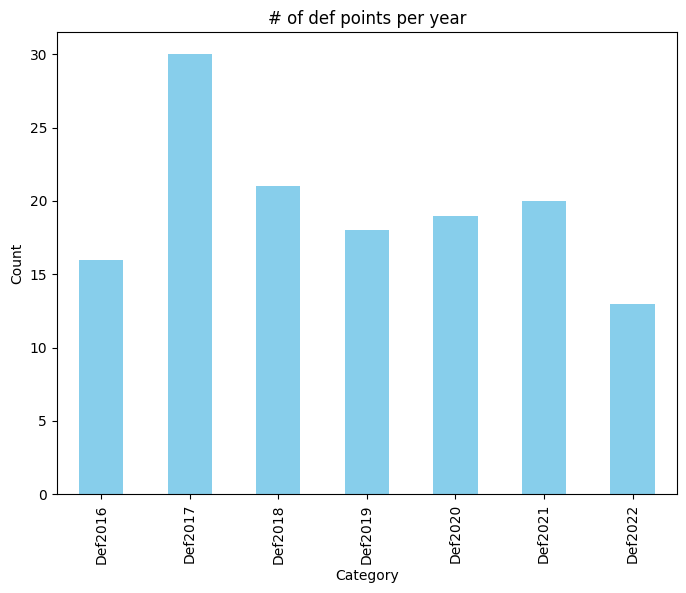

In [132]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

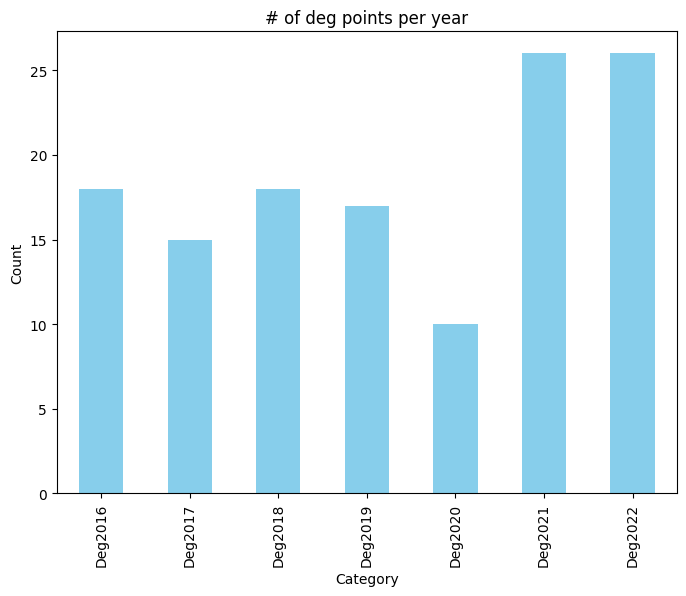

In [133]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [134]:
print(esbae_ceo.columns.values)

['geometry' 'point_id' 'images' 'mon_images' 'bfast_change_date'
 'bfast_magnitude' 'bfast_means' 'cusum_change_date' 'cusum_confidence'
 'cusum_magnitude' 'red_mean' 'red_sd' 'red_min' 'red_max' 'nir_mean'
 'nir_sd' 'nir_min' 'nir_max' 'swir1_mean' 'swir1_sd' 'swir1_min'
 'swir1_max' 'swir2_mean' 'swir2_sd' 'swir2_min' 'swir2_max' 'ndfi_mean'
 'ndfi_sd' 'ndfi_min' 'ndfi_max' 'brightness_mean' 'brightness_sd'
 'brightness_min' 'brightness_max' 'greenness_mean' 'greenness_sd'
 'greenness_min' 'greenness_max' 'wetness_mean' 'wetness_sd' 'wetness_min'
 'wetness_max' 'bs_slope_mean' 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min'
 'ewma_jrc_date' 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'es

In [135]:
merged_annual_counts = esbae_ceo['Ref_Change_Year_1522'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

Ref_Change_Year_1522
Def2016      16
Def2017      30
Def2018      21
Def2019      18
Def2020      19
Def2021      20
Def2022      13
Deg2016      18
Deg2017      15
Deg2018      18
Deg2019      17
Deg2020      10
Deg2021      26
Deg2022      26
NF         3885
Stable     2581
Name: count, dtype: int64

In [138]:
LC_counts = esbae_ceo['Ref_LCover'].value_counts()
LC_counts = merged_annual_counts.sort_index()
LC_counts

Ref_Change_Year_1522
Def2016      16
Def2017      30
Def2018      21
Def2019      18
Def2020      19
Def2021      20
Def2022      13
Deg2016      18
Deg2017      15
Deg2018      18
Deg2019      17
Deg2020      10
Deg2021      26
Deg2022      26
NF         3885
Stable     2581
Name: count, dtype: int64

In [136]:
print(esbae_ceo.dtypes)

geometry                 object
point_id                float64
images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightne

In [137]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF']
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].fillna(0)
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].astype(int)

#### 6. export merged esbae and ceo data to one csv file for next step

In [69]:
esbae_ceo.to_csv(esbae_ceo_data_out,index=False)